## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Tasks

## a. Data Loading

In [2]:
students_data = pd.read_csv('student-mat.csv',sep=';') #Read CSV file and store data in a dataframe object
students_data.head() #Display first 5 rows of students_data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


## b. Data Exploration

In [3]:
#Check for null values in the dataset
students_data.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

The dataset has no null values in any column

In [4]:
#Display data type of each column
students_data.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

The data in the dataset are of the data types integer and object.

In [5]:
#Display the no. of rows and columns present in the dataset
students_data.shape

(395, 33)

The dataset has 395 rows and 33 columns

## c. Data cleaning

In [6]:
#No missing values to remove or replace.
#dropna() function can be used to remove any null values from a dataframe
students_data.dropna(inplace=True) #inplace must be set to true to modify the dataframe. 

In [7]:
#Checking for duplicate values
students_data.duplicated().value_counts()

False    395
Name: count, dtype: int64

The dataset has no duplicated values

In [8]:
#function in pandas library to remove duplicated values from dataframe
students_data.drop_duplicates(inplace=True) #inplace is set to true to modify the dataframe

## d. Data analysis questions
1. What is the average score in math (G3)?

In [9]:
round(students_data['G3'].mean(),2)

np.float64(10.42)

The average score in math(G3) is 10.42.

2. How many students scored above 15 in their final grade (G3)?

In [10]:
np.count_nonzero(students_data['G3'] > 15)

40

40 students scored above 15 in their final grade(G3).

3. Is there a correlation between study time (study time) and the final grade (G3)?

In [11]:
students_data[['studytime','G3']].corr()

,studytime,G3
studytime,1.00000,0.09782
G3,0.09782,1.00000


The correlation coefficient between study time and final grade is 0.098 which is very low. So, there is no correlation between study time and the final grade.

4. Which gender has a higher average final grade (G3)?

In [12]:
group_by_gender = students_data.groupby('sex')
group_by_gender['G3'].mean()

sex
F     9.966346
M    10.914439
Name: G3, dtype: float64

Male students have a higher average final grade (G3).

## e. Data visualisation
### Histogram of final grades(G3)

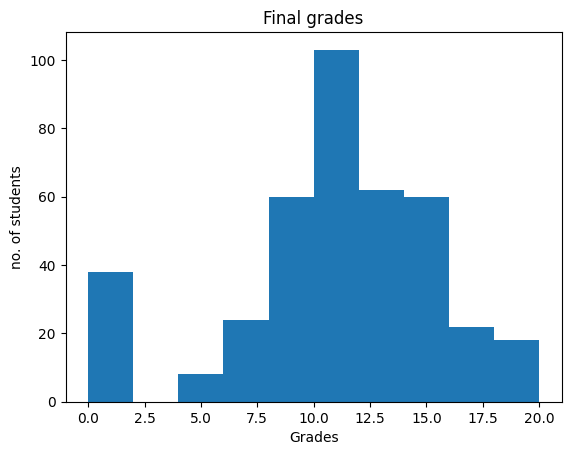

In [13]:
plt.hist(students_data['G3'])
plt.title("Final grades")
plt.xlabel('Grades')
plt.ylabel('no. of students')
plt.show()

Final grades follows normal distribution with right skew. The skew and the first bar in the histogram indicate possible outliers.

### Scatterplot between study time and final grade(G3)

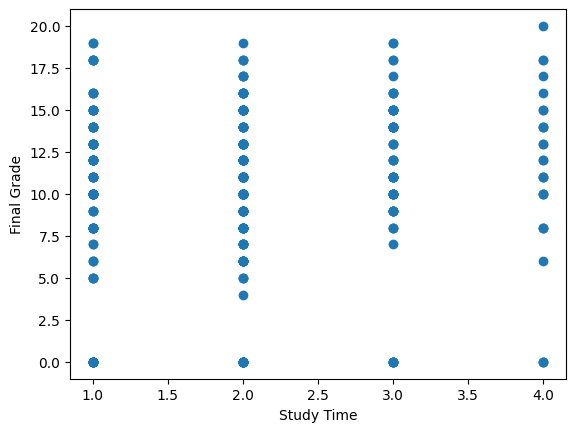

In [14]:
plt.scatter(students_data['studytime'],students_data['G3'])
plt.xlabel('Study Time')
plt.ylabel('Final Grade')
plt.show()

The scatter plot shows that there is no linear retaion ship between study time and final grade. It also shows that final grade values are similar irrespective of study time.

### Barchart to compare averages of male and female students

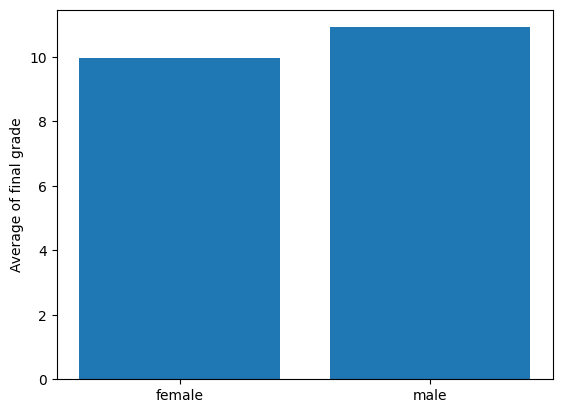

In [15]:

plt.bar(['female','male'],group_by_gender['G3'].mean())
plt.ylabel('Average of final grade')
plt.show()

The barchart shows that male students have a higher average final grade than female students. But the averages of final grade of both male and female students are close.